We begin with the standard imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

# Principal component analysis PCA

## Theoretical Problem

Consider a random variable X with p features, $X = (X^1,X^2,...X^p)^T$  

The goal of the PCA is to create $p$ new variables (principal components) which summarizes the best the variance of the previous $p$ variables such as if we take a subset of these new features the amount of variance provided is quite similar to the sum of variances of the whole original features.

We search new random variables, named principal components $Z^i$, as a linear combination of the original features $X^i$ i.e projecting X in a new basis.

\begin{align} Z^1 &= \alpha_{11}X^1 +\alpha_{12}X^2 + ... \alpha_{1p}X^p &= A_1^TX \\
 Z^2 &= \alpha_{21}X^1 +\alpha_{22}X^2 + ... \alpha_{2p}X^p &= A_2^TX  \\
 &\vdots \\
 Z^p &= \alpha_{p1}X^1 +\alpha_{p2}X^2 + ... \alpha_{pp}X^p &= A_p^TX
\end{align}

Eventually PCA looks for $A_1,...,A_p$ with the following conditions :
- $\forall i,  A^i= \underset{A}{\arg \max}\; Var(Z^i)$
- $Var(Z^1)\ge Var(Z^2)\ge...\ge Var(Z^p)$
- $\forall  i,j \; / \; i\neq j, cov(Z^i,Z^j) = 0 $
- $\forall i, Var(X^i) = 1$

The first principal components will contain most of the variance of X, we need to extract these first principal components for reducing the dimensionnality of our dataset.

Geometrically it means we seach for an orthogonal basis such as the inertia of the data points around the new axis is maximum.

### Theoretical Solution

If the random variable $X = (X^1,X^2,...X^p)^T $ is reduced & centered, i.e $ \forall i, E(X^i) =0 $ and $ Var(X^i) =1 $.

We call $\Sigma$ the covariance matrix of X
$$ \Sigma = P^TDP $$
with $D = diag(\lambda_1,\lambda_2,...,\lambda_p)$ such that $ \lambda_1 \ge\lambda_2 \ge ... \ge\lambda_p $

$\boxed{A_i =\text{ is the eigenvector of $\Sigma$ related to the eigenvalue $\lambda_i =$ the ith column of $P$ }}$

And $Var(Z^i) = \lambda_i$

### Practical Solution

Now imagine you have a dataset $M  \in \mathbb{R}^{n\times p}$ which could be interpreted as n realizations of the random variable X.

You need to create a centered matrix $\bar M=\begin{bmatrix} M_{1,1}-\bar M_1 & \cdots & M_{1,p}-\bar M_p \\ \vdots & \ddots & \vdots \\ M_{n,1}-\bar M_1 & \cdots & M_{n,p}-\bar M_p\end{bmatrix} $

With $\bar M_j = \frac{1}{n}\sum_{i=1}^n M_i^j$

We call $\bar \Sigma = \frac{1}{n-1}\bar M \bar M^T $the scatter matrix, which is an estimation of the covariance matrix.

### Point on reduction
We can make the choice to reduce $\bar M$ to give a variance of one to each feature.

- If we do so : variables related to noise will have the same weight after PCA than a relevant variable.
- If we don't reduce our dataset : high variance features will totally dominate the PCA.

However if the features aren't with the same units, reduction is mandatory.





### Question : Considering  $ \bar \Sigma = P^T D P $, how do we project the vector $X$ on the k first principal components.




Answer :

To project
X onto the first
k principal components, compute
$Z^k$ = $P_k^TX$, where $P_k$ corresponds to the first k eigenvectors (columns) of the covanriance matrix $\Sigma$. This is the representation (projection) of X in the reduced k-dimensional space.

### Question : How do we compute the percentage of orignal variance retained by the k first principal components

Answer :

To compute the percentage of original variance retained by the first k principal components, sum the first k eigenvalues of the covariance matrix and divide by the total sum of all eigenvalues. The formula is:

$$
\text{Variance Retained (%)} = \frac{\sum_{i=1}^k \lambda_i}{\sum_{i=1}^p \lambda_i} \times 100
$$


## Tasks :  Compute the PCA transformation

In [77]:
class my_pca:

    def __init__(self, reduce=False):
        '''
        Attributes:
        sigma : np.array
            the scatter matrix
        eigenvectors : np.array
            the eigenvectors in a matrix : P
        reduce : boolean
            Reduce the scatter matrix or not i.e give a variance of 1 for each feature
        X : np.array
            The dataset we want to project in the new basis
        '''
        self.sigma = None
        self.eigenvectors = None
        self.eigenvalues = None
        self.reduce = reduce

    def fit(self, X):
        """Compute the scatter matrix (sigma), and diagonalize it to extract eigenvectors and eigenvalues.

        Parameters:
        -----------
        X: (n, p) np.array
            Data matrix

        Returns:
        -----
        Update self.eigenvalues, self.eigenvectors
        """

        # Remove constant variance features
        variance = np.var(X, axis=0)
        constant_features = np.where(variance == 0)[0]
        if len(constant_features) > 0:
            print(f"Removing constant features: {constant_features}")
            X = np.delete(X, constant_features, axis=1)  # Remove constant features


        # Center the data
        X_centered = X - np.mean(X, axis=0)

        # Optionally reduce the features to unit variance
        if self.reduce:
            X_centered /= np.std(X_centered, axis=0)

        # Compute the scatter matrix
        self.sigma = np.cov(X_centered, rowvar=False)
        #self.sigma += np.eye(self.sigma.shape[0]) * 1e-10  # Add small regularization to the covariance matrix

        # Perform eigendecomposition
        self.eigenvalues, self.eigenvectors = np.linalg.eigh(self.sigma)

        # Sort eigenvalues and eigenvectors in descending order
        idx = np.argsort(self.eigenvalues)[::-1]
        self.eigenvalues = self.eigenvalues[idx]
        self.eigenvectors = self.eigenvectors[:, idx]

    def projection(self, X, no_dims):
        """Project X onto the first no_dims principal components.

        Parameters:
        -----------
        no_dims: integer
            The number of dimensions of our projected dataset
        X : np.array
            Dataset

        Returns:
        -----
        The projection of X on the no_dims principal components
        np.array of size (n, no_dims)
        """
        # Remove constant variance features
        variance = np.var(X, axis=0)
        constant_features = np.where(variance == 0)[0]
        if len(constant_features) > 0:
            X = np.delete(X, constant_features, axis=1)  # Remove constant features

        # Center the data
        X_centered = X - np.mean(X, axis=0)

        # Project onto the top no_dims eigenvectors
        return np.dot(X_centered, self.eigenvectors[:, :no_dims])

    def variance(self, no_dims):
        """Return the percentage of the total variance preserved by the projected dataset.

        Parameters:
        -----------
        no_dims: integer
            The number of dimensions of our projected dataset

        Returns:
        -----
        Percentage of variance retained
        """
        return np.sum(self.eigenvalues[:no_dims]) / np.sum(self.eigenvalues) * 100


## Application : Biostatistics

We are going to apply PCA to a medical dataset, in order to do data analysis and to finally  tell which medical features could allow doctors to diagnose breast cancer.



In [3]:
from sklearn.datasets import load_breast_cancer

In [34]:
H = load_breast_cancer()
X = load_breast_cancer().data
y = load_breast_cancer().target
feature_names = load_breast_cancer().feature_names

It seems that units of the features can be different, therefore we had better reduce our dataset in the PCA.
### Task : Apply PCA to the dataset

In [6]:
# Fit on our class
pca = my_pca(reduce=True)
pca.fit(X)

### Choosing the number of principal components for our projection

As usual with unsupervised method there are many solutions to answer this question. Generally people either use elbow technique or keep a number of principal components such as it provides 80% or 90% or 95% of the total variance.

### Task : Print the percentage of variance retained versus the number of principal components

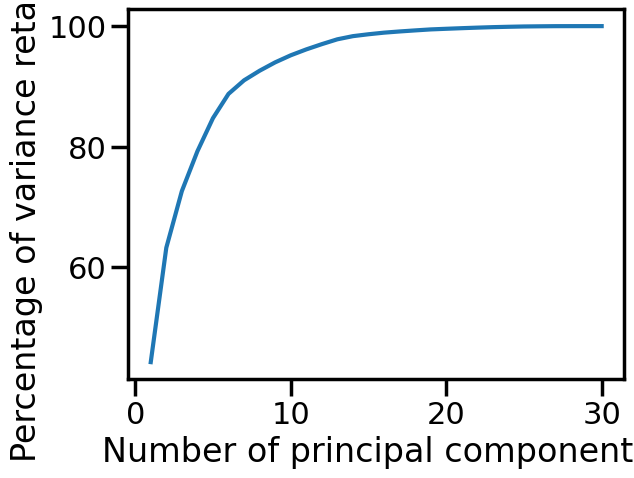

In [7]:
# Try for dimension going from 1 to n
n_components = np.arange(1, X.shape[1] + 1)

# Create the list of variance retained for the different number of components
variance_retained = [pca.variance(i) for i in n_components]

# Plot the result, we want an elbow curve
plt.plot(n_components, variance_retained)
plt.xlabel('Number of principal components')
plt.ylabel('Percentage of variance retained')
plt.show()

### Task : If we want to keep 90% of the variance how many principal components must we keep ?  

In [13]:
# Just filter on variance_retained to have the first element that is higher or equal to 90%
variance_90 = np.where(np.array(variance_retained) >= 90)[0][0]+1

# As variance is ordered in ascending order in variance_retained, we can directly get the index from:
print(f"To keep 90% of the variance, we need {variance_90} components")

To keep 90% of the variance, we need 7 components


### Task : Plot the datapoints with their label along the 2 first principal components.
Use plt.scatter

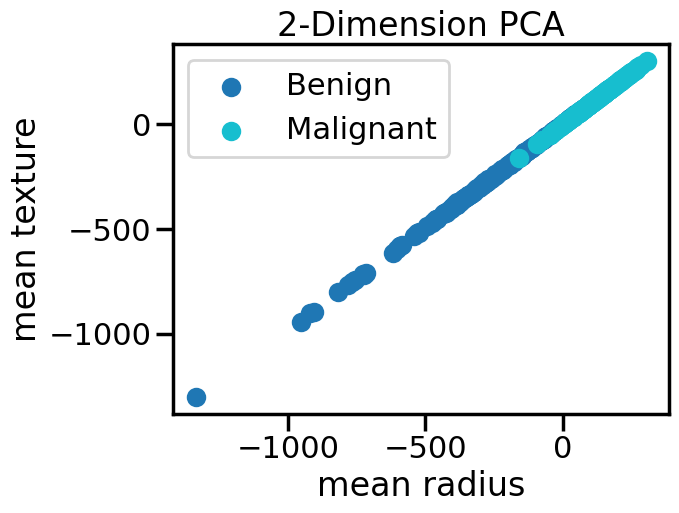

In [32]:
# Create a reduced X on 2 components
X_2 = pca.projection(X, 2)

# As we care about the first two components, we can get the labels with:
x_label = feature_names[np.argsort(pca.eigenvalues)[::-1][0]]
y_label = feature_names[np.argsort(pca.eigenvalues)[::-1][1]]

# Get unique classes and their corresponding colors
unique_classes = np.unique(y)
class_labels = ['Malignant' if c == 1 else 'Benign' for c in unique_classes]  # Map class to labels
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_classes)))  # Use a colormap for distinct colors

# Plot the scatter with a legend
for i, cls in enumerate(unique_classes):
    plt.scatter(X_2[y == cls, 0], X_2[y == cls, 1], color=colors[i], label=f'{class_labels[i]}')

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('2-Dimension PCA')
plt.legend()
plt.show()


What we can see is that we can simply assign a label to datapoints regarding their position on the first principal components.
So the first axis is sufficient to do a quite good classification of malignant/benin cases.

For our diagnostic, we must know which feature affect the most this first principal components.



### Question : Which features influence the most 2 the first principal components



In [35]:
# Extract the eigenvectors (which represent the principal components)
eigenvectors = pca.eigenvectors

# First principal component (PC1) and second principal component (PC2)
pc1 = eigenvectors[:, 0]  # First principal component
pc2 = eigenvectors[:, 1]  # Second principal component

# Get the absolute values of the coefficients to see the influence of each feature
pc1_influence = np.abs(pc1)
pc2_influence = np.abs(pc2)

# Find the indices of the most influential features
pc1_most_influential = np.argsort(pc1_influence)[::-1]
pc2_most_influential = np.argsort(pc2_influence)[::-1]

# Print the feature names and their influence on PC1 and PC2
print("Features influencing the most the first principal component (PC1):")
for idx in pc1_most_influential[:5]:  # Top 5 most influential features
    print(f"{feature_names[idx]}: {pc1_influence[idx]:.4f}")

print("\nFeatures influencing the most the second principal component (PC2):")
for idx in pc2_most_influential[:5]:  # Top 5 most influential features
    print(f"{feature_names[idx]}: {pc2_influence[idx]:.4f}")


Features influencing the most the first principal component (PC1):
mean concave points: 0.2609
mean concavity: 0.2584
worst concave points: 0.2509
mean compactness: 0.2393
worst perimeter: 0.2366

Features influencing the most the second principal component (PC2):
mean fractal dimension: 0.3666
fractal dimension error: 0.2801
worst fractal dimension: 0.2753
mean radius: 0.2339
compactness error: 0.2327


## Limitations of PCA.

By its linear nature, PCA suffers from its inability to extract complicated structure.

Let's see with an exemple.

In [73]:
X = np.loadtxt('mnist2500_X.txt')
labels = np.loadtxt('mnist2500_labels.txt')

### Tasks :
- Apply PCA to the dataset
- Project in 2D and plot the dataset with their label

In [78]:
# Fit our data to our model:
pca = my_pca(reduce=True)
pca.fit(X)

Removing constant features: [  0   1   2   3   4   5   6  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  33  34  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  71  80
  81  82  83  84  85  86  87  88 111 112 113 114 115 139 140 141 142 168
 169 170 196 197 224 225 252 253 280 308 336 364 392 420 448 476 504 532
 560 588 616 644 645 671 672 673 698 699 700 701 702 703 724 725 726 727
 728 729 730 731 732 752 753 754 755 756 757 758 759 760 761 764 765 766
 767 768 769 770 771 772 776 777 778 779 780 781 782 783]


I had to remove the constant variance features (reduce multicoplinearity), or it was not working

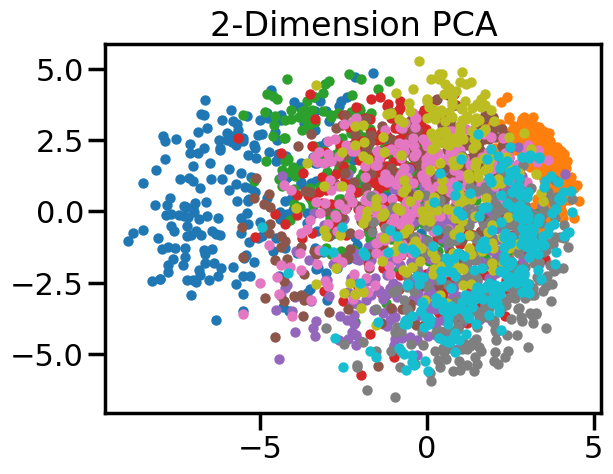

In [82]:
# Create a reduced X on 2 components
X_2 = pca.projection(X, 2)

# Get unique classes and their corresponding colors
unique_classes = np.unique(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_classes)))  # Use a colormap for distinct colors

# Plot the scatter with a legend
for i, cls in enumerate(unique_classes):
    plt.scatter(X_2[labels == cls, 0], X_2[labels == cls, 1], color=colors[i], label=f'{cls}', s=30)

plt.title('2-Dimension PCA')
plt.show()


It's quite impossible to distinguish most of the clusters.

### Non linear embedding : t-sne

In order to visualize dataset accurately, we are going to project our data using non linear methods in order to decompose faithfully the dataset in order to extract the intrisec structure of the data.

Sklearn definition of tsne : t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.




In [83]:
from sklearn.manifold import TSNE

### Tasks :
- Apply tsne to the dataset
- Plot the dataset with their label

In [84]:
# Fit the new model on our data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

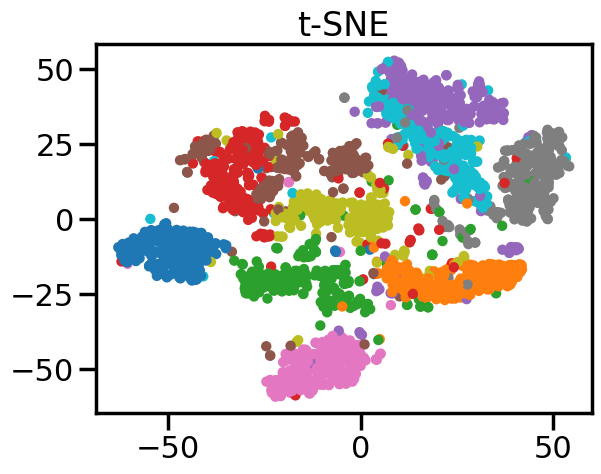

In [85]:
# Plot the results:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=30)
plt.title('t-SNE')
plt.show()

We can now clearly see clusters that are grouped by region, it works way better than PCA for our dataset.